# Trabajo final Econometría
## Estimador de salarios en puestos Tech de EEUU
### Hecho por: Matthew Samuel Horne Negro, Francisco Javier Checa Casas y Pedro Castaño


# Primeros modelos econométricos

### 1

In [90]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
import numpy as np
import statsmodels.stats.outliers_influence as oi
import statsmodels.graphics.api as smg
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as diag

Me gusta tener todos los imports juntos por comodidad y no tener que estar repitiéndolos o ejecutando celdas específicas para no compilar todo el cuaderno

In [91]:
data = pd.read_csv('Salary_Data.csv')

X = data.values[:, [0, 4]].astype(int)  # Age, Years of Experience
Y = data.values[:, 5].astype(int)  # Salary

results = sm.OLS(Y, sm.add_constant(X)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     6539.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:34:16   Log-Likelihood:                -77296.
No. Observations:                6582   AIC:                         1.546e+05
Df Residuals:                    6579   BIC:                         1.546e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.89e+04   3462.794     28.559      0.0

**R-squared (R-cuadrado):**

R-squared es una medida de la bondad de ajuste del modelo de regresión. En este caso, el valor es 0.665, lo que significa que aproximadamente el 66.5% de la variabilidad en la variable dependiente (y) puede ser explicada por las variables independientes (x1 y x2) incluidas en el modelo. Un R-cuadrado más alto indica un mejor ajuste del modelo a los datos. Este se alcanzará conforme vayamos haciendo más complejo el modelo e introduzcamos más variables clave como Job Title o Education.

**Adj. R-squared (R-cuadrado ajustado):**

El R-cuadrado ajustado es similar al R-cuadrado, pero tiene en cuenta el número de variables independientes en el modelo. En este caso, el valor es también 0.665, lo que sugiere que el ajuste del modelo es consistente con el número de variables independientes incluidas.

**F-statistic (Estadístico F):**

El estadístico F se utiliza para evaluar la significación conjunta de todas las variables independientes en el modelo. Un valor grande del estadístico F (en este caso, 6539) con un p-valor pequeño (0.00) sugiere que al menos una de las variables independientes es significativa en la explicación de la variabilidad en la variable dependiente.

**Coeficientes:**

Bajo la sección "coef", se observan los coeficientes estimados para las variables en el modelo. En este caso, hay tres coeficientes: uno para la constante (intercepto), otro para x1 y otro para x2. Estos coeficientes indican cuánto cambia la variable dependiente (y) por unidad de cambio en las variables independientes (x1 y x2).
Por ejemplo, el coeficiente para x2 es 9044.7257, lo que significa que, manteniendo todas las demás variables constantes, ceteris paribus, un aumento de una unidad en x2 se asocia con un aumento de aproximadamente 9044.7257 unidades en la variable dependiente (y), es decir, que en este caso por cada 1 año de experiencia más (Years of experience = x2) aumenta 9044.7257$ el salario (Salary = y)

**Estadísticas adicionales:**

Se proporcionan varias estadísticas adicionales, como el estadístico Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis, entre otros. Estas estadísticas pueden ayudar a evaluar suposiciones sobre el modelo y la normalidad de los errores residuales.

<div class="alert alert-info">
    <strong>Nota:</strong> Al usar una base de datos con variables que son de tipo string para este primer modelo solo usaremos
    variables numéricas y que han tenido que ser forzosamente convertidas a int porque si no, genera un error de tipos.
    <br><br>
    Más adelante habrá que convertir las variables categóricas en dummies para el correcto funcionamiento

</div>

### 2

In [92]:
n = 100

X = np.random.normal(0, 10, n)
Y = X + np.random.normal(0, 1, n)

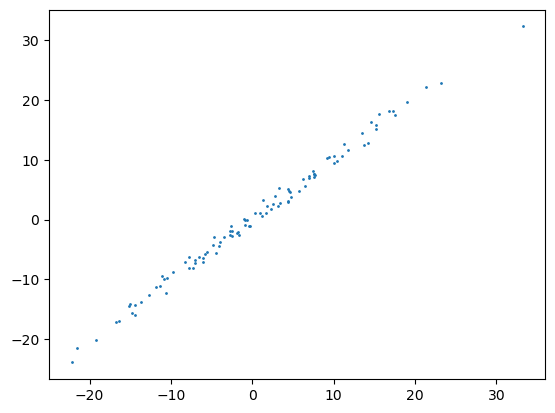

In [93]:
plt.scatter(X, Y, s=1)

plt.show()

In [94]:
results = sm.OLS(Y, sm.add_constant(X)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.443e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.40e-108
Time:                        20:34:17   Log-Likelihood:                -129.01
No. Observations:                 100   AIC:                             262.0
Df Residuals:                      98   BIC:                             267.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.089      1.137      0.2

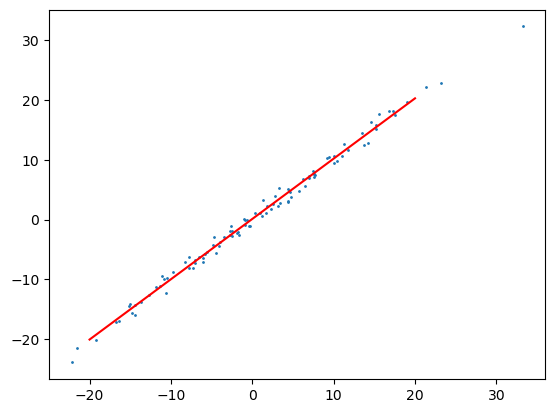

In [95]:
cte = results.params[0]
beta1 = results.params[1]

plt.plot([-20, 20], [cte + beta1 * (-20), cte + beta1 * 20], color='r')
plt.scatter(X, Y, s=1)

plt.show()

El código de los bloques realiza una simulación de datos y ajusta un modelo de regresión lineal a dichos datos.

1. **Generación de Datos:** Se crean dos conjuntos de datos, X e Y, donde X son valores tomados de una distribución normal con una media de 0 y desviación estándar de 10, e Y es una función lineal de X más un término de error aleatorio normalmente distribuido. Esto simula una relación lineal entre X e Y con algo de ruido.

2. **Visualización de Datos:** Se genera un gráfico de dispersión utilizando matplotlib para visualizar la relación entre X e Y. Cada punto representa una observación del conjunto de datos simulado.

3. **Ajuste de Modelo de Regresión:** Se ajusta un modelo de regresión lineal ordinaria de mínimos cuadrados utilizando statsmodels con Y como variable dependiente y X como independiente. Se añade una constante al modelo para incluir un término de intercepto. Se imprime un resumen del modelo que proporciona detalles estadísticos del ajuste.

4. **Visualización del Modelo de Regresión:** Se extraen el intercepto y la pendiente (coeficientes) del modelo ajustado y se utiliza para dibujar la línea de regresión sobre el gráfico de dispersión existente. La línea roja representa la relación estimada entre X e Y según el modelo de regresión.

---

# Estimación e Inferencia en Modelos de Regresión Lineales

## Modelo 1

In [96]:
# Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV
df = pd.read_csv('Salary_Data.csv')

# Muestra información general sobre el DataFrame, como el tipo de datos y los valores no nulos
#print(df.info())

# Muestra estadísticas descriptivas de las variables numéricas
print(df.describe())

               Age  Years of Experience         Salary
count  6582.000000          6582.000000    6582.000000
mean     33.570799             8.071711  115768.665755
std       7.606075             6.042927   52677.912125
min      21.000000             0.000000   25000.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


1. **Count (Conteo):** Muestra el número total de entradas (no nulas) para cada variable.
    - En este caso, hay 6582 entradas para cada una de las variables: Age (Edad), Years of Experience (Años de Experiencia) y Salary (Salario).

2. **Mean (Media):** Es el promedio de los valores para cada variable.
    - La edad promedio es aproximadamente 33.57 años.
    - Los años de experiencia promedio son aproximadamente 8.07 años.
    - El salario promedio es de aproximadamente 115,768.67 unidades monetarias ($).

3. **Std (Desviación Estándar):** Mide la cantidad de variación o dispersión de un conjunto de valores.
    - La desviación estándar de la edad es aproximadamente 7.6 años, lo que indica la variabilidad de la edad en el conjunto de datos.
    - La desviación estándar de los años de experiencia es de aproximadamente 6.04 años.
    - La desviación estándar del salario es de aproximadamente 52,677.91, indicando la variabilidad en los salarios.

4. **Min (Mínimo):** Es el valor más bajo en cada columna.
    - La edad mínima es de 21 años.
    - El mínimo de años de experiencia es 0 (personas sin experiencia previa).
    - El salario mínimo es de 25,000.

5. **25% (Percentil 25):** Este es el valor por debajo del cual se encuentra el 25% de los datos.
    - 25% de los empleados tienen 28 años o menos.
    - 25% tienen 3 años o menos de experiencia.
    - 25% ganan 70,000 o menos.

6. **50% (Mediana o Percentil 50):** Es el valor medio, donde la mitad de los datos está por debajo de este valor y la otra mitad por encima.
    - La mediana de la edad es de 32 años.
    - La mediana de los años de experiencia es de 7 años.
    - La mediana del salario es de 115,000.

7. **75% (Percentil 75):** El valor por debajo del cual se encuentra el 75% de los datos.
    - 75% de los empleados tienen 38 años o menos.
    - 75% tienen 12 años o menos de experiencia.
    - 75% ganan 160,000 o menos.

8. **Max (Máximo):** Es el valor más alto en cada columna.
    - La edad máxima es de 62 años.
    - El máximo de años de experiencia es de 34 años.
    - El salario máximo es de 250,000.

In [97]:
datos = pd.read_csv('Salary_Data.csv')
datos = pd.get_dummies(datos, columns=['Education Level', 'Job Title', 'Gender'], dtype=int)

display(datos)

,Age,Years of Experience,Salary,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Back end Developer,Job Title_Content Marketing Manager,Job Title_Customer Service Representative,...,Job Title_Senior UX Designer,Job Title_Social Media Manager,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Project Manager,Job Title_Web Developer,Gender_Female,Gender_Male,Gender_Other
0,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,38,10,155000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,25,2,69032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6578,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6579,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6580,31,8,104127,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-info">
    <strong>Nota:</strong> He estado horas atascado creando las dummies, al crear los dummies por defecto los tipos se establecen a TRUE o FALSE, sin embargo nosotros solo trabajamos con números así que, después de horas averigué que solo había que castearlo a tipo int (dtype=int).

</div>

In [98]:
y = datos['Salary']

# Definir 'X' incluyendo todas las columnas de 'Education Level_*' y 'Years of Experience'
# Filtrar las columnas que comienzan con 'Education Level_'
education_columns = [col for col in datos if col.startswith('Education Level_')]
job_columns = [col for col in datos if col.startswith('Job Title_')]
gender_columns = [col for col in datos if col.startswith('Gender_')]

X = sm.add_constant(datos[education_columns + ['Years of Experience'] + job_columns + ['Age'] + gender_columns])

## Estadísticos Descriptivos:

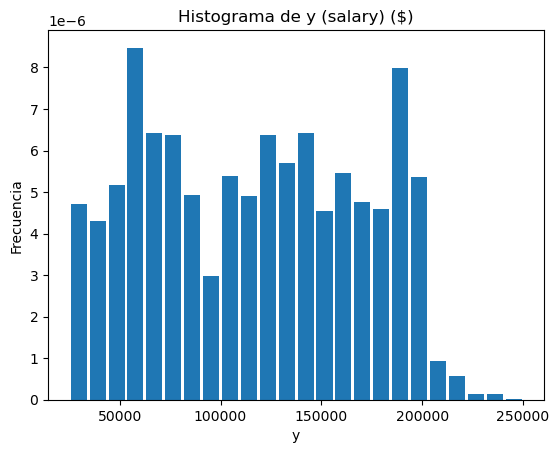

Q1:  70000.0 ($) Mediana: 115000.0 ($) Q3:  160000.0 ($) DT:  52673.91030849146 ($) Media: 115768.66575508963 ($)


In [99]:
media = np.mean(y)
Q1 = np.quantile(y, 0.25)
Q3 = np.quantile(y, 0.75)
DesviacionTipica = np.std(y)
Mediana = np.median(y)
histograma = plt.hist(y, bins='auto', rwidth=0.85, density=True)
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.title("Histograma de y (salary) ($)")
plt.show()
print("Q1: ", Q1, "($) Mediana:", Mediana, "($) Q3: ", Q3, "($) DT: ", DesviacionTipica, "($) Media:", np.mean(y),
      "($)")

1. Media: 115,768.67
2. Primer Cuartil (Q1): 70,000.00
3. Tercer Cuartil (Q3): 160,000.00
4. Desviación Estándar: 52,673.91
5. Mediana: 115,000.00

In [100]:
#np.asarray(education_columns)
mco1 = sm.OLS(y, X).fit()
print(mco1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     328.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:34:17   Log-Likelihood:                -74882.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6478   BIC:                         1.507e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

<div class="alert alert-info">
    <strong>Nota:</strong> Como vemos ya se nos está avisando de que puede haber problemas con la multicolinealidad, intentaremos solucionarlo más adelante cuando llegue el momento quizás con una depuración manual de los datos o utilizar técnicas como el factor de inflación de la varianza (VIF) para identificar y posiblemente eliminar variables independientes que estén altamente correlacionadas.

</div>

## Interpretación de los resultados

#### Medidas de Bondad de Ajuste:

- **R-squared (R-cuadrado):**
    El valor es 0.839, lo que indica que aproximadamente el 83.9% de la variabilidad en el salario se puede explicar con el modelo. Es una medida bastante alta de bondad de ajuste considerando que estamos tratando de estimar salarios.

- **Adjusted R-squared (R-cuadrado ajustado):**
    Con un valor de 0.837, después de ajustar por el número de predictores, sigue siendo muy alto, lo que indica que el modelo se ajusta bien a los datos.

- **F-statistic (Estadístico F):**
    Con un valor de 328.4 y un Prob (F-statistic) cercano a 0, sugiere que el modelo es estadísticamente significativo en su conjunto, es decir, hay evidencia de que al menos una de las variables independientes está relacionada con el salario.

#### Diagnóstico de Residuos:
- **Omnibus:**
    El valor del test estadístico es 97.368, que es bastante alto. Este resultado sugiere que hay una fuerte evidencia estadística de que los residuos no se distribuyen normalmente.

- **Prob(Omnibus):**
    El valor p asociado con el estadístico Omnibus es 0.000. Un valor p tan bajo (generalmente se considera significativo si es menor que 0.05) indica que podemos rechazar la hipótesis nula de que los residuos tienen una distribución normal. Esto significa que hay una alta probabilidad de que los residuos no sigan una distribución normal.

- **Durbin-Watson:**
    El valor es 0.216, que está muy por debajo de 2, sugiriendo la presencia de autocorrelación positiva entre los residuos, lo que podría ser un problema, ya que los residuos de un modelo bien ajustado deben ser independientes entre sí.

- **Jarque-Bera (JB) y Prob(JB):**
    -El valor del estadístico JB es 178.435 y el valor p es extremadamente pequeño, indicando que los residuos no siguen una distribución normal, lo cual es una violación de uno de los supuestos de la regresión OLS.

- **Skew (Asimetría):**
    El valor de -0.062 indica que la distribución de los residuos es ligeramente asimétrica, pero no es una preocupación mayor dado que está cerca de cero.

- **Kurtosis:**
    Un valor de 3.797 sugiere que la distribución de los residuos tiene colas más pesadas que una distribución normal, lo cual podría ser una señal de outliers o de un pico más pronunciado.

- **Cond. No. (Número de Condición):**
    El valor es extremadamente alto (4.75e+16), lo que indica la presencia de multicolinealidad entre las variables predictoras. Esto significa que algunas de las variables independientes están altamente correlacionadas entre sí, lo que puede inflar los errores estándar de los coeficientes y hacer que las estimaciones sean inestables.interpret


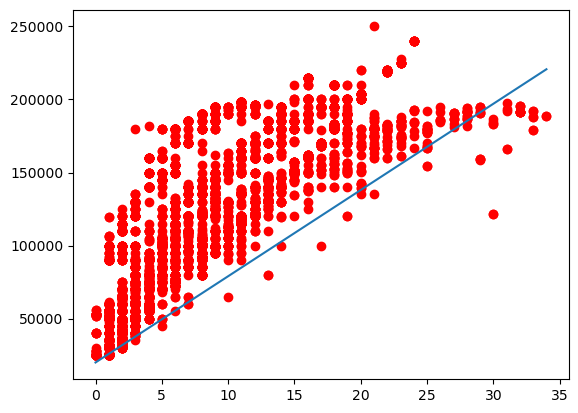

In [101]:
beta2 = mco1.params
plt.plot(datos['Years of Experience'], y, 'o', color='r')
xmin = np.min(datos['Years of Experience'])
xmax = np.max(datos['Years of Experience'])
# Use iloc to access positions in the beta2 series
plt.plot([xmin, xmax], [beta2.iloc[0] + beta2.iloc[1] * xmin, beta2.iloc[0] + beta2.iloc[1] * xmax])
plt.show()


C:\Users\matth\.conda\envs\Econometria\lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


Figure(640x480)


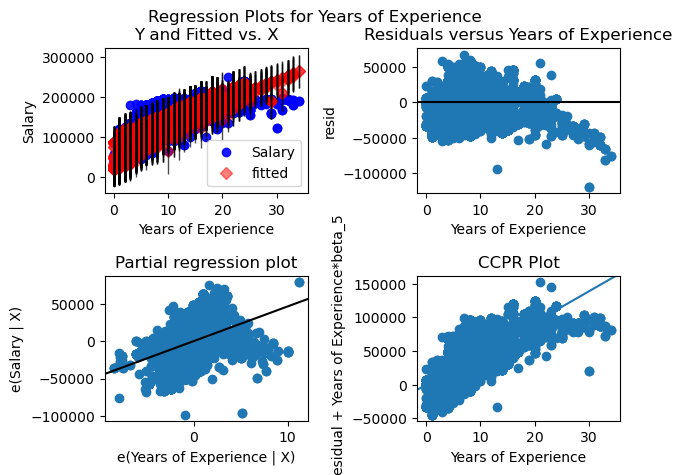

In [102]:
print(sm.graphics.plot_regress_exog(mco1, 'Years of Experience'))

In [103]:
e=mco1.resid
print(e)
print(np.mean(e))

0       -9564.773378
1       -9564.773378
2       -9564.773378
3       -9564.773378
4       25592.649552
            ...     
6577    18946.239792
6578    28045.751309
6579    28045.751309
6580    29335.151228
6581    29335.151228
Length: 6582, dtype: float64
-5.762399248133601e-10


El valor obtenido sugiere que, en promedio, el modelo subestima ligeramente el valor real. Sin embargo, en el contexto de los modelos de regresión, un promedio de residuos de aproximadamente -5.7624e-10 podría considerarse insignificante, especialmente si la escala de la variable de respuesta (salario en este caso) es grande, como en decenas o cientos de miles. Este resultado es una señal de que el modelo está bien calibrado en términos de no tener un sesgo sistemático hacia sobreestimaciones o subestimaciones en las predicciones.

- Suma de Cuadrados Totales (SCT)

In [104]:
print(mco1.centered_tss)

18262027724544.66


Representa la variabilidad total en la variable dependiente. Es igual a la suma de las diferencias al cuadrado entre cada valor observado y la media de todos los valores observados. Un valor de 18262027724544.66 indica el total de variabilidad en tu variable dependiente que el modelo busca explicar.

- Suma de Cuadrados Explicada (SCE)

In [105]:
print(mco1.ess)

15326748750986.516


Representa la variabilidad en la variable dependiente que es explicada por el modelo. Es igual a la suma de las diferencias al cuadrado entre los valores predichos por el modelo y la media de la variable dependiente. Un valor de 15326748750986.516 sugiere que esta es la cantidad de variabilidad que el modelo ha logrado explicar.

- Suma de Cuadrados de los residuos (SCR)

In [106]:
print(mco1.ssr)

2935278973558.1436


Representa la variabilidad en la variable dependiente que no es explicada por el modelo. Es igual a la suma de los cuadrados de los residuos (errores) del modelo. Un valor de 2935278973558.1436 indica la cantidad de variabilidad que el modelo no ha podido explicar.

- $R^2$ y $R^2$ ajustado

In [107]:
print("R2: ", mco1.rsquared)
print("R2 Ajustado: ", mco1.rsquared_adj)

R2:  0.8392687264616815
R2 Ajustado:  0.8367131041747956


R-cuadrado ($R^2$): Es una medida de la bondad de ajuste del modelo. Un valor de 0.8392687264616815(o aproximadamente 83.93%) significa que aproximadamente el 83.93% de la variabilidad en la variable dependiente es explicada por las variables independientes en el modelo.

R-cuadrado ajustado: Es una versión ajustada del R-cuadrado que tiene en cuenta el número de predictores en el modelo. Un valor de 0.8367131041747956 es bastante similar al R-cuadrado, lo que indica que el modelo es robusto incluso después de ajustar por el número de variables.

- Valor ( F<sub>exp</sub> ): Valor F experimental
- Valor ( F<sub>teo</sub> ): Valor F teórico


In [108]:
Fexp=mco1.fvalue
print(Fexp)
from scipy import stats
alpha=0.025
Fteo= stats.f.ppf(1-alpha, mco1.df_model, mco1.df_resid)
print(Fteo)

328.40092636864495
1.2941958816630579


Valor F experimental (Fexp): Es el valor calculado de la estadística F para el modelo. Un valor de 328.40092636864495 es bastante alto, lo que sugiere que el modelo es estadísticamente significativo.

Valor F teórico (Fteo): Es el valor crítico de la distribución F para un cierto nivel de significancia y grados de libertad. Un valor de 1.2941958816630579 es el umbral sobre el cual se consideraría que el modelo tiene una contribución significativa.

- Valor ( t<sub>exp</sub> ): Valor t experimental
- Valor ( t<sub>teo</sub> ): Valor t teórico

In [109]:
texp=mco1.tvalues
print(texp)
alpha=0.098
tteo= stats.t.ppf(1-(alpha/2),mco1.df_resid)
print(tteo)

const                                 8.568314
Education Level_Bachelor's Degree     6.558402
Education Level_High School          -6.227709
Education Level_Master's Degree      11.953818
Education Level_PhD                   9.801300
                                       ...    
Job Title_Web Developer              -5.079476
Age                                   4.909789
Gender_Female                         7.350917
Gender_Male                           7.415737
Gender_Other                         -1.440958
Length: 107, dtype: float64
1.6548666162477454



Valor t Experimental (Valor t de la Prueba): Este valor es el resultado de una prueba t aplicada a un estimador, como un coeficiente en un modelo de regresión. Se calcula como el coeficiente estimado dividido por el error estándar de ese coeficiente. En el contexto de la regresión, indica cuántas desviaciones estándar el estimador está lejos de 0. Un valor t alto (en valor absoluto) sugiere que es menos probable que el verdadero valor del parámetro sea 0, lo que implica que la variable correspondiente es significativa en el modelo.

Valor t Teórico (Valor t Crítico): Se utiliza como umbral para decidir si rechazar la hipótesis nula. Si el valor t experimental es mayor en valor absoluto que el valor t teórico, se rechaza la hipótesis nula (por ejemplo, que un coeficiente es igual a cero en la regresión).

- Intervalos de confianza de Estimadores

In [110]:
print(mco1.conf_int(0.075))

                                              0             1
const                              15763.161180  24034.249186
Education Level_Bachelor's Degree   4302.478576   7509.763215
Education Level_High School       -13077.577773  -7261.750911
Education Level_Master's Degree     9897.452337  13362.463899
Education Level_PhD                10255.359086  14809.221935
...                                         ...           ...
Job Title_Web Developer           -16743.255868  -8050.957384
Age                                  371.632352    794.627903
Gender_Female                       9887.910509  16210.129328
Gender_Male                        10092.445489  16471.212285
Gender_Other                      -14381.054794   1516.767548

[107 rows x 2 columns]


Un intervalo de confianza ofrece un rango de valores dentro del cual se espera que se encuentre el verdadero valor del parámetro, con un cierto nivel de confianza.
En la regresión, cada coeficiente tiene un intervalo de confianza asociado. Si un intervalo de confianza para un coeficiente no incluye el 0, esto sugiere que la variable correspondiente es significativamente diferente de 0, lo que implica que tiene un efecto significativo en la variable dependiente.

- Estimación de la varianza de la pertrubación:

In [111]:
beta3=np.array(mco1.params)
e =mco1.resid
sum(e**2)/(mco1.nobs-1)
sigmagorro=(np.dot(y.values, y.values)-np.dot(beta3.T, np.dot(X.values.T,y.values)))/(mco1.nobs-1)

print(sigmagorro)

446023244.7284085


Un valor bajo indica que el modelo explica una gran parte de la variabilidad, mientras que un valor alto sugiere que hay más factores no capturados que influyen en los salarios.
En nuestro caso vemos que el valor es alto y que los residuos no se distribuyen normalmente, puede ser necesario transformar las variables, agregar términos al modelo o utilizar otro tipo de modelo de regresión que no requiera la normalidad de los residuos.

---

# Multicolinealidad

Como hemos visto anteriormente nuestro modelo actual tiene un problema de multicolinealidad que trataremos de solucionar ahora. Refresquemos la memoria:

In [112]:
print(mco1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     328.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:34:20   Log-Likelihood:                -74882.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6478   BIC:                         1.507e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Y como hemos mencionado nos advierte de posible multicolinealidad

In [113]:
print(mco1.condition_number) #Número de Condición

4.7547306544113624e+16


Un número de condición alto sugiere una posible multicolinealidad en los datos, lo que significa que al menos una de las variables predictoras es casi una combinación lineal de las otras. Esto puede llevar a problemas en la estimación de los coeficientes del modelo, ya que pequeños cambios en los datos o en el modelo pueden resultar en grandes cambios en los coeficientes estimados. En términos prácticos, un número de condición alto puede hacer que los resultados de la regresión sean poco fiables.

En términos generales:

Un número de condición cercano a 1 indica un problema bien condicionado (bajo riesgo de multicolinealidad).
Un número de condición moderadamente alto (valores de miles o decenas de miles) puede ser motivo de cierta preocupación y merece una investigación más detallada.
Un número de condición muy alto (valores en los cientos de miles o más) sugiere un alto grado de multicolinealidad y un problema potencialmente mal condicionado.

En nuestro caso vemos como este es un número enorme, posiblemente debido a los dummies que al crear 200 variables distintas produzcan este error.
Por ello vamos a emplear técnicas como el factor de inflación de la varianza (VIF) para identificar y posiblemente eliminar variables independientes que estén altamente correlacionadas.

In [114]:
datos = pd.read_csv('Salary_Data.csv')
datos = pd.get_dummies(datos, columns=['Education Level', 'Job Title', 'Gender'], dtype=int)

display(datos)

,Age,Years of Experience,Salary,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Back end Developer,Job Title_Content Marketing Manager,Job Title_Customer Service Representative,...,Job Title_Senior UX Designer,Job Title_Social Media Manager,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Project Manager,Job Title_Web Developer,Gender_Female,Gender_Male,Gender_Other
0,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,38,10,155000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,25,2,69032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6578,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6579,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6580,31,8,104127,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
y = datos['Salary']

# Definir 'X' incluyendo todas las columnas de 'Education Level_*' y 'Years of Experience'
# Filtrar las columnas que comienzan con 'Education Level_'
education_columns = [col for col in datos if col.startswith('Education Level_')]
job_columns = [col for col in datos if col.startswith('Job Title_')]
gender_columns = [col for col in datos if col.startswith('Gender_')]

X = sm.add_constant(datos[education_columns + ['Years of Experience'] + job_columns + ['Age'] + gender_columns])

In [116]:
vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

C:\Users\matth\.conda\envs\Econometria\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\matth\.conda\envs\Econometria\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


[0.0, inf, inf, inf, inf, 11.453897890225143, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 11.852499000546805, inf, inf, inf]


Observamos el warning "RuntimeWarning: divide by zero encountered in scalar divide" sugiere que en el cálculo de algún VIF, se está intentando dividir por cero. Esto suele suceder cuando una de las variables independientes en el modelo de regresión es una combinación lineal perfecta de otras variables independientes, o tiene una varianza extremadamente baja que está causando problemas numéricos.

Los valores de VIF se muestran en la salida, y muchos de ellos son inf, que significa infinito. Un valor de VIF infinito indica una multicolinealidad perfecta, lo que significa que algunas variables predictoras pueden ser exactamente predichas a partir de otras variables predictoras en el modelo sin error.

In [117]:
corr_matrix=np.corrcoef(X.T)
print(corr_matrix)

[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan  1.         -0.24296903 ... -0.1037192   0.1075222
  -0.04155774]
 [        nan -0.24296903  1.         ...  0.06142793 -0.07481163
   0.14482651]
 ...
 [        nan -0.1037192   0.06142793 ...  1.         -0.99571119
  -0.04162161]
 [        nan  0.1075222  -0.07481163 ... -0.99571119  1.
  -0.05099286]
 [        nan -0.04155774  0.14482651 ... -0.04162161 -0.05099286
   1.        ]]


C:\Users\matth\.conda\envs\Econometria\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\matth\.conda\envs\Econometria\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


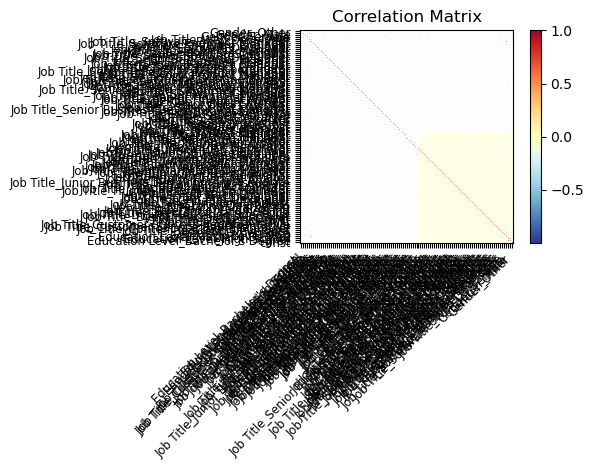

In [118]:
smg.plot_corr(corr_matrix, X)
plt.show()

Es bastante evidente cuál podría ser el primer remedio para este problema... Reducir el número de variables, esto se conseguirá estudiando que variables no tienen relevancia para eliminarlas y agrupando las que sí sean positivas para el modelo.

Hagamos una primera prueba muy sencilla solo añadiendo drop_first=True a la hora de crear los dummies para eliminar la primera columna

In [119]:
datos = pd.read_csv('Salary_Data.csv')
datos = pd.get_dummies(datos, columns=['Education Level', 'Job Title', 'Gender'], drop_first=True, dtype=int)
y = datos['Salary']
# Definir 'X' incluyendo todas las columnas de 'Education Level_*' y 'Years of Experience'
# Filtrar las columnas que comienzan con 'Education Level_'
education_columns = [col for col in datos if col.startswith('Education Level_')]
job_columns = [col for col in datos if col.startswith('Job Title_')]
gender_columns = [col for col in datos if col.startswith('Gender_')]

X = sm.add_constant(datos[education_columns + ['Years of Experience'] + job_columns + ['Age'] + gender_columns])

mco1 = sm.OLS(y, X).fit()
print(mco1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     328.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:34:26   Log-Likelihood:                -74882.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6478   BIC:                         1.507e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [120]:
print(mco1.condition_number) #Número de Condición

2939.3166087713585


Simplemente con ese paso previo hemos pasado de un Número de Condición = (4.75e+16) que tenía nuestro modelo original a un Número de Condición = (2.94e+03)

Y volvemos a ejecutar la técnica VIFs

In [121]:
vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

[148.19105092564013, 4.210218858036766, 1.9856541197490931, 3.6789174734278776, 11.453897890225143, 1.3273319305841689, 1.0635226254644388, 1.0048567853056725, 2.3898331399586774, 3.389222632465192, 1.0650371655378517, 1.2085480623966263, 1.0712235459423327, 1.4013652344021472, 1.0123202355120642, 1.381268685055849, 1.4332269841357246, 1.0757701998016598, 1.1592529238660378, 1.5805370304551576, 1.131061626251198, 1.934129973474469, 2.2315403729034102, 1.101276352300933, 1.2332222731145321, 1.4881802206694148, 1.0173768904692426, 1.0369107018232517, 1.0318887883088292, 1.1074113101102534, 1.037153581307847, 1.187029933576172, 1.3617055692448672, 1.0143528892916733, 1.0285011373286876, 1.2196496684876523, 1.0134849331492128, 1.0183666812845666, 1.0182269873512857, 1.0090235071061426, 2.825856719009789, 1.3013865452632993, 1.2736857143834868, 1.2240819840570925, 1.1864867240984802, 1.040162586502375, 1.0272683281492534, 1.5496521812985533, 1.6909544539512855, 1.3320356508719484, 2.0961593

Como podemos ver ya prácticamente todas las variables están cerca del valor 1 que como hemos visto indica un problema bien condicionado (bajo riesgo de multicolinealidad).

Pero podemos seguir depurándolo. Si nos fijamos hay 2 variables en concreto que resaltan más que las demás, la primera con valor aproximado de 148.191 y la antepenúltima con valor aproximado de 11.852499

Viendo esto y además con un poco de sentido común podemos razonar que a la hora de estimar salarios tanto la edad como el género de la persona no debería de ser un factor influyente en el resultado así que eliminemos esas 2 variables y veamos que pasa.

In [122]:
datos = pd.read_csv('Salary_Data.csv')
datos = pd.get_dummies(datos, columns=['Education Level', 'Job Title', 'Gender'], drop_first=True, dtype=int)

#datos.drop('Job Title_Data Analyst', axis=1, inplace=True)
#datos.drop('Job Title_Marketing Manager', axis=1, inplace=True)
#datos.drop('Job Title_Web Developer', axis=1, inplace=True)

y = datos['Salary']
# Definir 'X' incluyendo todas las columnas de 'Education Level_*' y 'Years of Experience'
# Filtrar las columnas que comienzan con 'Education Level_'
education_columns = [col for col in datos if col.startswith('Education Level_')]
job_columns = [col for col in datos if col.startswith('Job Title_')]
gender_columns = [col for col in datos if col.startswith('Gender_')]

X = sm.add_constant(datos[education_columns + ['Years of Experience'] + job_columns])
#X = sm.add_constant(datos[education_columns + job_columns])
#X = sm.add_constant(datos[education_columns + ['Years of Experience']])

mco1 = sm.OLS(y, X).fit()
print(mco1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     336.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:34:29   Log-Likelihood:                -74901.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6481   BIC:                         1.507e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [123]:
vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

[30.43895837426429, 3.8278539528814477, 1.9343164521286191, 3.5097142696194505, 2.2921120431899618, 1.3069205114368065, 1.056517167932063, 1.0043740352642005, 2.3768730903410566, 3.3180720844382745, 1.0605458106047092, 1.2068230699613576, 1.0629537897116415, 1.3949935270744764, 1.0121774879348626, 1.3754426370522206, 1.419867459832385, 1.0745321596824153, 1.1566836284349786, 1.5441942410006682, 1.1296549681205708, 1.9275512960801464, 2.215205207043959, 1.0942517020046145, 1.2183583723920837, 1.4227358524077307, 1.017105804279596, 1.0338461585984082, 1.029904987044315, 1.1059105818713115, 1.0336250620872125, 1.1704681168630677, 1.3371096796912862, 1.0127023095489305, 1.0255574780828898, 1.2115908641969524, 1.01255230932729, 1.016933746045366, 1.0168428706230348, 1.0084240881830042, 2.670454594504972, 1.2774336857713486, 1.2484778049046952, 1.2201306430541834, 1.1787572973084353, 1.0361113865251108, 1.0239645562867303, 1.5468270648565172, 1.610837513005247, 1.3177328259794692, 2.06278205

In [124]:
print(mco1.condition_number) #Número de Condición

833.5492164806706


Efectivamente, al eliminar variables que no tienen relación con el salario el Número de Condición = (2.94e+03) que tenía nuestro modelo con Edad y Género se ha reducidoa tan solo un Número de Condición = 834 sin sacrificar la medida de bondad R^2^

Ya no nos advierte de que pueda haber problemas de multicolinealidad, pero probemos a reducir el número de variables agrupando elementos de la variable Job Title por sectores, esto puede llevar a estimaciones más imprecisas al tener datos más generales de cada ámbito pero probemos a ver que Número de Condición resultaría.

<div class="alert alert-info">
    <strong>Nota:<br><br></strong> Eliminando la variable 'Years of Experience' el Nº de Cond. pasa de 833.5492 a 89.2, pero $R^2$ se ve afectado en un decremento de 0.838 a 0.680
    <br><br>
    Eliminando la variable 'job_columns' el Nº de Cond. pasa de 833.5492 a 43.8, pero $R^2$ se ve afectado en un decremento de 0.838 a 0.709
    <br><br>
    Los comandos datos.drop no son necesarios pero están porque pueden reducir el valor de los índices VIF.
</div>

In [125]:
datos = pd.read_csv('Salary_Data - Copy.csv')
datos = pd.get_dummies(datos, columns=['Education Level', 'Job Title'], drop_first=True, dtype=int)
y = datos['Salary']
# Definir 'X' incluyendo todas las columnas de 'Education Level_*' y 'Years of Experience'
# Filtrar las columnas que comienzan con 'Education Level_'
education_columns = [col for col in datos if col.startswith('Education Level_')]
job_columns = [col for col in datos if col.startswith('Job Title_')]

X = sm.add_constant(datos[education_columns + ['Years of Experience'] + job_columns])

mco2 = sm.OLS(y, X).fit()
print(mco2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1408.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:34:32   Log-Likelihood:                -70773.
No. Observations:                6131   AIC:                         1.416e+05
Df Residuals:                    6115   BIC:                         1.417e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [126]:
vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

[33.82647625096572, 1.883492153943131, 1.563302882693807, 2.3629416307313273, 1.7651020579063146, 5.444153999998622, 3.0662473983740264, 4.162153326378486, 5.566408763428103, 1.8006505641307637, 3.2190383733654913, 5.113969904266806, 1.7406847624220196, 3.016237063243227, 4.081734355444842, 5.079922471776112]


In [127]:
corr_matrix=np.corrcoef(X.T)
print(corr_matrix)

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan  1.         -0.16396765 -0.13052986 -0.24728956 -0.10895694
  -0.06877541 -0.03583651 -0.07292447 -0.01667689  0.05223703 -0.08898534
  -0.03944413 -0.06670834  0.65979148 -0.0911176 ]
 [        nan -0.16396765  1.         -0.32851679  0.15082559 -0.15402567
  -0.06172485 -0.00985305  0.19665406  0.01315989  0.12405858  0.16345379
  -0.09451984  0.05642932 -0.16681462 -0.07186532]
 [        nan -0.13052986 -0.32851679  1.          0.4918669   0.08145064
  -0.12818476 -0.17746974  0.04927165 -0.07071985 -0.02484736 -0.05748777
  -0.07902814 -0.1254299  -0.10360137  0.51126169]
 [        nan -0.24728956  0.15082559  0.4918669   1.          0.05274751
  -0.13871538 -0.19130701  0.28127107  0.05993263 -0.02597449  0.06929764
  -0.11961223 -0.06225298 -0.21713667  0.21166372]
 [   

C:\Users\matth\.conda\envs\Econometria\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\matth\.conda\envs\Econometria\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


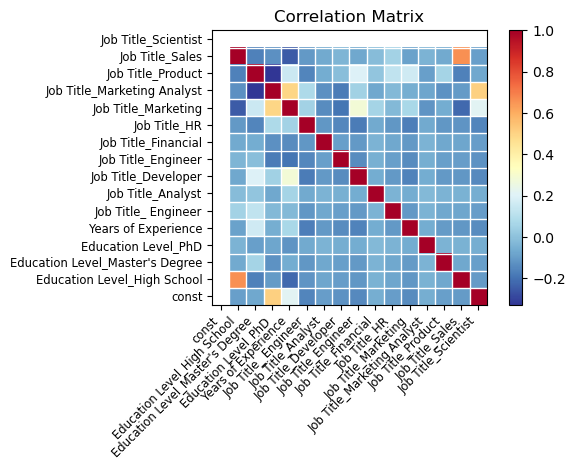

In [128]:
smg.plot_corr(corr_matrix, X)
plt.show()

Como vemos la única ventaja relevante es la reducción a la mitad del factor Omnibus lo cual nos indica que nos estamos acercando más a una distribución normal de los residuos, pero esto no compensa la perdida dl índice de bondad $R^2$ tan elevado así que trataremos el problema de la heteroscedasticidad presente en el siguiente apartado.

# Heteroscedatiscidad

Anteriormente hemos solucionado el problema de la multicolinealidad, sin embargo al ejecutar nuestro modelo se nos seguía advirtiendo y se deduce el alto valor de la variable Omnibus que la distribución de los residuos no es normal, esto es un problema de heteroscedasticidad que trataremos ahora.

In [129]:
print(mco1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     336.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:34:32   Log-Likelihood:                -74901.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6481   BIC:                         1.507e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [130]:
name = ['Jarque-Bera Est', 'Jarque-Vera p-val', 'Skew', 'Kurtosis']
test = sms.jarque_bera(mco1.resid)
for i in range(4):
    print(name[i], test[i])

Jarque-Bera Est 187.68008386577776
Jarque-Vera p-val 1.761114557397467e-41
Skew -0.11253871875137268
Kurtosis 3.7960399233594857


- El estadístico de Jarque-Bera es 187.68, lo cual es muy alto. Este test combina la asimetría y la curtosis para evaluar si la distribución de los residuos se desvía de la normalidad. Un valor más alto indica una mayor desviación de la normalidad.

- El valor p asociado con el estadístico de Jarque-Bera es extremadamente pequeño (alrededor de 1.76e-41). Un valor p tan bajo indica que podemos rechazar la hipótesis nula de que los residuos tienen una distribución normal.

- La asimetría de los residuos es -0.1125, lo que indica una leve asimetría hacia la izquierda. Sin embargo, este valor está bastante cerca de cero, lo que sugiere que la asimetría no es muy pronunciada.

- La curtosis es 3.7960, que es ligeramente menor que el valor de 3 que se esperaría de una distribución normal. Esto indica que la distribución de los residuos tiene colas ligeramente menos pesadas que una distribución normal, aunque este valor no es muy lejano de 3.

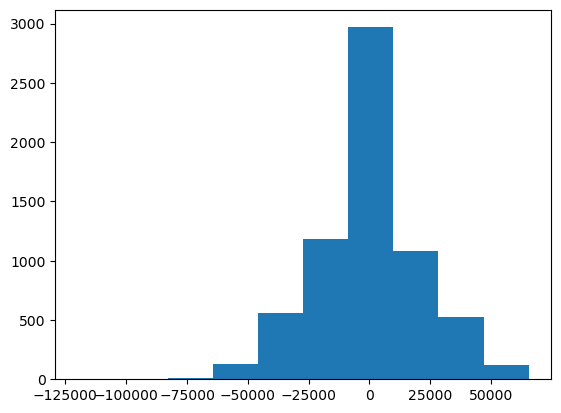

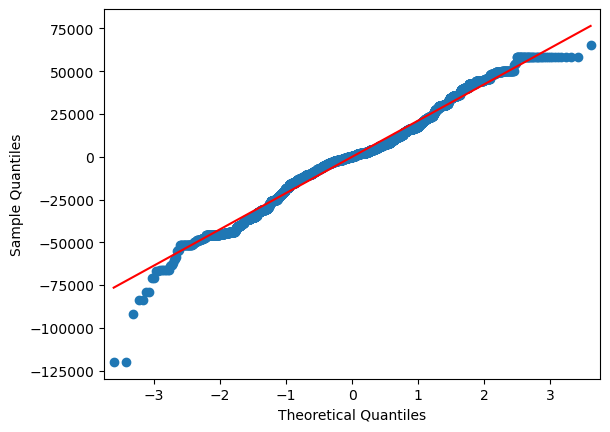

In [131]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(mco1.resid)
pyplot.show()
qqplot(mco1.resid, line='s')
pyplot.show()

In [132]:
print(diag.kstest_normal(mco1.resid))

(0.06763807355053464, 0.0009999999999998899)


- El primer valor (0.0676) es el estadístico D de Kolmogorov-Smirnov, que mide la distancia máxima entre la función de distribución acumulativa (CDF) de los residuos y la CDF de una distribución normal. Un valor más alto indica una mayor desviación de la normalidad.

- El segundo valor (aproximadamente 0.0) es el valor p del test. Como es menor que cualquier umbral comúnmente usado para significancia estadística (como 0.05 o 0.01), rechazas la hipótesis nula de que la distribución de los residuos es normal.

### Bootstrapping

In [133]:
datos = pd.read_csv('Salary_Data.csv')
datos = pd.get_dummies(datos, columns=['Education Level', 'Job Title', 'Gender'], drop_first=True, dtype=int)

y = datos['Salary']
# Definir 'X' incluyendo todas las columnas de 'Education Level_*' y 'Years of Experience'
# Filtrar las columnas que comienzan con 'Education Level_'
education_columns = [col for col in datos if col.startswith('Education Level_')]
job_columns = [col for col in datos if col.startswith('Job Title_')]

X = sm.add_constant(datos[education_columns + ['Years of Experience'] + job_columns])

from random import choices

beta=[]
n=len(y)
for it in range(1000): #repetimos 1000 veces la estimacion
    I=choices(list(range(n)), k=n) # elegimos una muestra con repeticion de los datos
    mco3 = sm.OLS(y[I], sm.add_constant(X.values[I,:])).fit() #ajustamos el modelo
    beta.append(list(mco3.params)) # guardamos los coeficientes
beta=np.array(beta)
k=len(X.T)
for i in range(k):
    q025=np.percentile(beta[:,i], 2.5) #percentil 2.5%
    q975=np.percentile(beta[:,i], 97.5) #percentil 97.5%
    media=np.mean(beta[:,i]) #media de los betas
    sd=np.std(beta[:,i]) #desviación tipica de los betas
    print(i, media,[q025, q975])

0 69605.1876564757 [67425.63164805784, 71838.1839427706]
1 -18974.8788641223 [-22681.506692764942, -15450.711551357474]
2 6113.412514689686 [4298.797848326014, 7962.303465619971]
3 8136.7934453598145 [5367.512043456362, 10948.951869692868]
4 5245.210775382092 [5058.341887248405, 5443.334298946277]
5 -7467.097563612045 [-11337.955991939736, -3339.593517751029]
6 -30903.92056078018 [-40927.5817810432, -23368.90174360426]
7 -22409.45493142906 [-36761.34074492413, 3.016812932337564e-10]
8 28187.196442337812 [24944.837411869506, 31421.226522810797]
9 30539.8316082257 [26385.846392967567, 34263.34192113655]
10 -22517.777660857646 [-26404.42898504475, -18413.36031126166]
11 -15770.468210153424 [-20186.103648223703, -11581.78267333169]
12 -25503.770241546674 [-27496.062097227226, -23316.669101337964]
13 37752.74424779175 [34135.59343836983, 41439.91094897284]
14 840.103178521766 [-5229.9092603716, 6620.554365306964]
15 -16005.912793645632 [-19005.26181724343, -12563.476560532192]
16 -1263.9209

Inicializa una lista vacía beta para almacenar los resultados de los coeficientes de las simulaciones de bootstrapping.
Realiza 1000 iteraciones de bootstrapping. En cada iteración:
- Selecciona una muestra aleatoria con reemplazo de los índices de los datos (esto simula el remuestreo de los datos).
- Ajusta un modelo de regresión lineal a la muestra remuestreada.
- Guarda los coeficientes estimados del modelo en la lista beta.

Los percentiles calculados representan los límites del intervalo de confianza del 95% para los coeficientes, basado en la distribución de bootstrapping.
La finalidad de este proceso es estimar la distribución de los coeficientes del modelo de regresión más allá de lo que el modelo ajustado a los datos originales puede proporcionar. El bootstrapping es especialmente útil cuando la distribución de los estimadores no es conocida o es difícil de derivar analíticamente. Los intervalos de confianza calculados a partir de la distribución de bootstrapping pueden proporcionar una medida robusta de la incertidumbre en las estimaciones de los coeficientes.

In [134]:
print(mco1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     336.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:35:10   Log-Likelihood:                -74901.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6481   BIC:                         1.507e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [135]:
print(mco1.model.exog)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]


In [136]:
#GOLDFELD-QUANDT (Muestras Pequeñas)
GQ=sms.het_goldfeldquandt(y, sm.add_constant(datos["Years of Experience"]), split=1/3, drop=1/3)
print("Goldfeld Quandt: ", GQ)

Goldfeld Quandt:  (0.910836799262464, 0.9855773263736483, 'increasing')


- 0.910836799262646 es el estadístico de prueba de Goldfeld-Quandt.
- 0.9855773263736483 es el valor p de la prueba.
Dado que el valor p es alto, no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad, lo que significa que no hay evidencia de heterocedasticidad en los datos según esta prueba.

In [137]:
#GOLDFELD-QUANDT (Muestras Pequeñas)
GQ=sms.het_goldfeldquandt(y, sm.add_constant(datos["Job Title_Data Scientist"]), split=1/3, drop=1/3)
print("Goldfeld Quandt: ", GQ)
GQ=sms.het_goldfeldquandt(y, sm.add_constant(datos["Job Title_Software Engineer"]), split=1/3, drop=1/3)
print("Goldfeld Quandt: ", GQ)
GQ=sms.het_goldfeldquandt(y, sm.add_constant(datos["Job Title_Product Manager"]), split=1/3, drop=1/3)
print("Goldfeld Quandt: ", GQ)

Goldfeld Quandt:  (1.0799969693602454, 0.035825252375682286, 'increasing')
Goldfeld Quandt:  (0.9406042555898245, 0.9241164212747489, 'increasing')
Goldfeld Quandt:  (1.0303003879061037, 0.2423737511305098, 'increasing')


In [138]:
#GOLDFELD-QUANDT (Muestras Pequeñas)
GQ=sms.het_goldfeldquandt(y, sm.add_constant(datos["Education Level_PhD"]), split=1/3, drop=1/3)
print("Goldfeld Quandt PhD: ", GQ)
GQ=sms.het_goldfeldquandt(y, sm.add_constant(datos["Education Level_Master\'s Degree"]), split=1/3, drop=1/3)
print("Goldfeld Quandt Master: ", GQ)
GQ=sms.het_goldfeldquandt(y, sm.add_constant(datos["Education Level_High School"]), split=1/3, drop=1/3)
print("Goldfeld Quandt HS: ", GQ)

Goldfeld Quandt PhD:  (0.8573587850660624, 0.999841192601101, 'increasing')
Goldfeld Quandt Master:  (0.9859492655103042, 0.6297581076460459, 'increasing')
Goldfeld Quandt HS:  (1.193158224426769, 1.8056629526727206e-05, 'increasing')


Con algunas pruebas más observamos como el valor de p de 'Education Level_High School' es minúsculo. Un valor p por debajo de un nivel de significancia común (como 0.05 o 0.01) indica que hay suficiente evidencia para rechazar la hipótesis nula de que la varianza de los residuos es constante a lo largo del rango de los datos, es decir, que hay heteroscedasticidad.

In [139]:
print(y)

0       155795
1       155795
2       155795
3       155795
4       155000
         ...  
6577     69032
6578     62852
6579     62852
6580    104127
6581    104127
Name: Salary, Length: 6582, dtype: int64


In [140]:
#BREUSH-PAGAN
BP=sms.het_breuschpagan(mco1.resid, mco1.model.exog)
print("Breush Pagan: ", BP)

Breush Pagan:  (2636.2711196503346, 0.0, 43.30169062436876, 0.0)


In [141]:
#WHITE
W=sms.het_white(mco1.resid, mco1.model.exog)
print("White: ", W)

White:  (4183.491365170884, 0.0, 41.90071787625975, 0.0)


En ambos casos, los valores p reportados son 0.0, lo que indica que hay evidencia estadística significativa para rechazar la hipótesis nula de que los errores son homocedásticos (tienen varianzas constantes). Esto significa que los resultados de ambas pruebas apuntan a la presencia de heterocedasticidad en los residuos del modelo.

In [142]:
print(mco1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     336.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:36:45   Log-Likelihood:                -74901.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6481   BIC:                         1.507e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [143]:
BP=sms.het_breuschpagan(mco1.resid, mco1.model.exog)
print(BP)

(2636.2711196503346, 0.0, 43.30169062436876, 0.0)


In [144]:
#GLEJSER
for h in [-2, -1, -0.5, 0.5, 1, 2]:
    # Asegúrate de que no haya ceros en los datos antes de elevar a una potencia negativa
    X_nonzero = X.replace(0, np.nan)  # Reemplaza 0 por NaN para evitar divisiones por cero
    X_transformed = X_nonzero.astype(float)**h  # Eleva a la potencia de h
    X_transformed = X_transformed.fillna(0)  # Reemplaza NaNs con 0s si es necesario, dependiendo del contexto
    X_transformed = X_transformed.replace([np.inf, -np.inf], np.nan)  # Reemplaza inf por NaN
    X_transformed = X_transformed.dropna(axis=1, how='all')  # Elimina las columnas donde todos los valores son NaN

    mcoaux = sm.OLS(abs(mco1.resid), sm.add_constant(X_transformed)).fit()
    beta3 = mcoaux.params
    pval=beta3.iloc[1]
    print("h: ", h, "-> pval:", pval, "R2: ", mcoaux.rsquared)


h:  -2 -> pval: -1121.3066387639974 R2:  0.5234351497238743
h:  -1 -> pval: -954.6005847249088 R2:  0.5238683473871624
h:  -0.5 -> pval: -895.6405674440686 R2:  0.5261917096444197
h:  0.5 -> pval: 22.28766095946156 R2:  0.5362475062627883
h:  1 -> pval: -464.8118462532539 R2:  0.5447958389819536
h:  2 -> pval: -1413.3507550983572 R2:  0.560325575653229


In [145]:
mcp = sm.WLS(y, sm.add_constant(X), weights=1/y).fit()
print(mcp.summary())

                            WLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.883
Model:                            WLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     487.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:36:46   Log-Likelihood:                -74134.
No. Observations:                6582   AIC:                         1.485e+05
Df Residuals:                    6481   BIC:                         1.492e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [146]:
datos = pd.read_csv('Salary_Data - Copy.csv')
datos = pd.get_dummies(datos, columns=['Education Level', 'Job Title'], drop_first=True, dtype=int)
y = datos['Salary']

# Definir 'X' incluyendo todas las columnas de 'Education Level_*' y 'Years of Experience'
# Filtrar las columnas que comienzan con 'Education Level_'
#education_columns = [col for col in datos if col.startswith('Education Level_')]
job_columns = [col for col in datos if col.startswith('Job Title_')]

X = sm.add_constant(datos[['Years of Experience'] + job_columns])

mco2 = sm.OLS(y, X).fit()
print(mco2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1632.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:36:46   Log-Likelihood:                -70953.
No. Observations:                6131   AIC:                         1.419e+05
Df Residuals:                    6118   BIC:                         1.420e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [147]:
#BREUSH-PAGAN
BP=sms.het_breuschpagan(mco2.resid, mco2.model.exog)
print("Breush Pagan: ", BP)

Breush Pagan:  (1107.4138418861382, 1.4766939117211072e-229, 112.3891325077351, 9.573057510320074e-254)


In [148]:
#WHITE
W=sms.het_white(mco2.resid, mco2.model.exog)
print("White: ", W)

White:  (2290.328981072364, 0.0, 151.71772382035223, 0.0)


In [149]:
robust_model = mco2.get_robustcov_results()
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1894.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:36:46   Log-Likelihood:                -70953.
No. Observations:                6131   AIC:                         1.419e+05
Df Residuals:                    6118   BIC:                         1.420e+05
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [150]:
from scipy.stats import boxcox
datos = pd.read_csv('Salary_Data - Copy2.csv')
datos = pd.get_dummies(datos, columns=['Education Level', 'Job Title'], drop_first=True, dtype=int)
#y, lambda_opt = boxcox((datos['Salary']))
#y = np.log(datos['Salary'])
y = np.sqrt(datos['Salary'])
# Definir 'X' incluyendo todas las columnas de 'Education Level_*' y 'Years of Experience'
# Filtrar las columnas que comienzan con 'Education Level_'
#education_columns = [col for col in datos if col.startswith('Education Level_')]
job_columns = [col for col in datos if col.startswith('Job Title_')]

X = sm.add_constant(datos[['Years of Experience'] + job_columns])

mco2 = sm.OLS(y, X).fit()
print(mco2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1628.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:36:46   Log-Likelihood:                -27265.
No. Observations:                5302   AIC:                         5.455e+04
Df Residuals:                    5291   BIC:                         5.462e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  222.6245 

In [151]:
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(mco2.resid)
print(dw)

2.0238536195393353
